In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense

In [14]:
# Define training data --> linear function y=mx+b
m, b = 2, 5
x_train = np.arange(0,10,0.005)
y_train = x_train*m+b

x_test = np.arange(-1,11,0.005)
y_test = x_test*m+b

In [37]:
# Definition of the simple 1 neuron linear model

# Input Layer
input_layer = keras.layers.Input((1,))

# Dense layer takes the input layer as its argument
x = Dense(1, activation='linear')(input_layer)

# The model is finally defined as the input and the last layer
model = Model(inputs=input_layer, outputs=x)

In [4]:
# Define loss function and optimizer
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [5]:
# Fit
model.fit(x_train, y_train, epochs=20, batch_size=10, verbose=1)

Epoch 1/20
200/200 [==============================] - 0s 598us/step - loss: 24.0066 - mse: 24.0066
Epoch 2/20
200/200 [==============================] - 0s 608us/step - loss: 0.4597 - mse: 0.4597
Epoch 3/20
200/200 [==============================] - 0s 608us/step - loss: 0.0634 - mse: 0.0634
Epoch 4/20
200/200 [==============================] - 0s 603us/step - loss: 0.0087 - mse: 0.0087
Epoch 5/20
200/200 [==============================] - 0s 642us/step - loss: 0.0013 - mse: 0.0013
Epoch 6/20
200/200 [==============================] - 0s 685us/step - loss: 1.8062e-04 - mse: 1.8062e-04
Epoch 7/20
200/200 [==============================] - 0s 648us/step - loss: 2.4680e-05 - mse: 2.4680e-05
Epoch 8/20
200/200 [==============================] - 0s 663us/step - loss: 3.4886e-06 - mse: 3.4886e-06
Epoch 9/20
200/200 [==============================] - 0s 648us/step - loss: 5.0740e-07 - mse: 5.0740e-07
Epoch 10/20
200/200 [==============================] - 0s 693us/step - loss: 6.8532e-08 - mse

In [15]:
# Evaluate
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

75/75 [==============================] - 0s 966us/step - loss: 9.9452e-11 - mse: 9.9452e-11

mse: 0.00%

loss: 0.00%


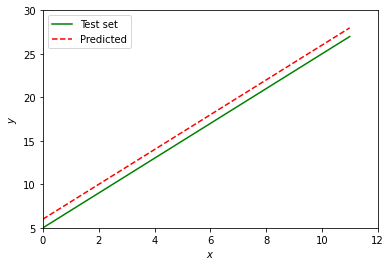

In [22]:
# Predict
y_predictions=model.predict(x_test)

# Plot predictions
plt.figure("two plots")
plt.plot(x_test, y_test, label = 'Test set', color='g', linestyle='-')
plt.plot(x_test, y_predictions+1, label = 'Predicted', color='r', linestyle='--')
plt.xlim([0,12])
plt.ylim([5,30])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.show()

# Now let's learn a gaussian curve

In [24]:
# Training data --> gaussian: y = e^(-x**2)
x_train = np.arange(-5,5,0.005)
y_train = np.exp(-x_train**2)

x_test = np.random.random(size=50)*15-7.5 # x ~ U[-7.5,7.5]
y_test = np.exp(-x_test**2)

In [29]:
# Let's reuse the same architecture as before
model2 = Model(inputs=input_layer, outputs=x)

# Same loss function and optimizer
model2.compile(loss='mse', optimizer='sgd', metrics=['mse'])

# Fit 
model2.fit(x_train, y_train, epochs=20, batch_size=10, verbose=0)

Epoch 1/20
200/200 [==============================] - 0s 690us/step - loss: 0.0885 - mse: 0.0885
Epoch 2/20
200/200 [==============================] - 0s 676us/step - loss: 0.0932 - mse: 0.0932
Epoch 3/20
200/200 [==============================] - 0s 645us/step - loss: 0.0927 - mse: 0.0927
Epoch 4/20
200/200 [==============================] - 0s 673us/step - loss: 0.0890 - mse: 0.0890
Epoch 5/20
200/200 [==============================] - 0s 633us/step - loss: 0.0930 - mse: 0.0930
Epoch 6/20
200/200 [==============================] - 0s 704us/step - loss: 0.0979 - mse: 0.0979
Epoch 7/20
200/200 [==============================] - 0s 764us/step - loss: 0.0993 - mse: 0.0993
Epoch 8/20
200/200 [==============================] - 0s 618us/step - loss: 0.0915 - mse: 0.0915
Epoch 9/20
200/200 [==============================] - 0s 630us/step - loss: 0.0965 - mse: 0.0965
Epoch 10/20
200/200 [==============================] - 0s 619us/step - loss: 0.0925 - mse: 0.0925
Epoch 11/20
200/200 [========

In [30]:
# Evaluate test data
scores = model2.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model2.metrics_names[0], scores[0]*100))

2/2 [==============================] - 0s 0s/step - loss: 0.1052 - mse: 0.1052

mse: 10.52%

loss: 10.52%


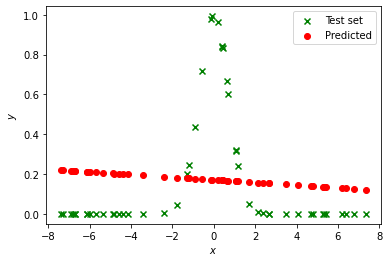

In [43]:
# Predict
y_predictions=model2.predict(x_test)

# Plot predictions
plt.scatter(x_test, y_test, label = 'Test set', color='g', marker='x')
plt.scatter(x_test, y_predictions, label = 'Predicted', color='r', marker='o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.show()

## What happened? We tried modelling non-linear data with a linear model! Let's change the activation function

In [38]:
# Let's define a new model, with a hidden layer of 8 neurons
input_layer = Input((1,))
x = Dense(8, activation='tanh')(input_layer) #8 neurons
x = Dense(1, activation='relu')(x)
model3 = Model(inputs=input_layer, outputs=x)


# Same loss function and optimizer
model3.compile(loss='mse', optimizer='sgd', metrics=['mse'])

# Fit 
model3.fit(x_train, y_train, epochs=20, batch_size=10, verbose=0)

In [41]:
# Evaluate test data
scores = model3.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model3.metrics_names[0], scores[0]*100))

2/2 [==============================] - 0s 0s/step - loss: 8.1401e-04 - mse: 8.1401e-04

mse: 0.08%

loss: 0.08%


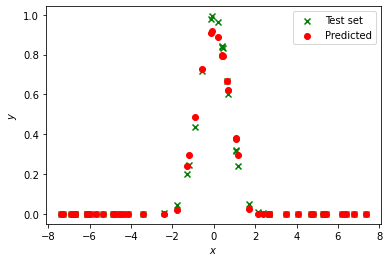

In [44]:
# Predict
y_predictions=model3.predict(x_test)

# Plot predictions
plt.scatter(x_test, y_test, label = 'Test set', color='g', marker='x')
plt.scatter(x_test, y_predictions, label = 'Predicted', color='r', marker='o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.show()

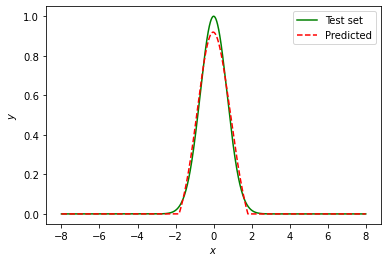

In [48]:
# Let's see the curves that the neural net draws
x_test = np.arange(-8,8,0.005)
y_test = np.exp(-x_test**2)

# Predict
y_predictions=model3.predict(x_test)

# Plot predictions
plt.plot(x_test, y_test, label = 'Test set', color='g', linestyle='-')
plt.plot(x_test, y_predictions, label = 'Predicted', color='r', linestyle='--')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.show()

### Now we have a prediction curve that looks much more like the curve we expect to obtain.
### Adding more neurons to the hidden layer will enhance the results.

In [68]:
input_layer = Input((1,))
x = Dense(16, activation='tanh')(input_layer) #16 neurons
x = Dense(1, activation='relu')(x)
model4 = Model(inputs=input_layer, outputs=x)
model4.compile(loss='mse', optimizer='sgd', metrics=['mse'])
model4.fit(x_train, y_train, epochs=50, batch_size=10, verbose=0) #Now do 50 epochs instead of 20

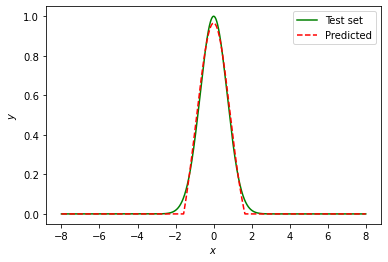

In [69]:
# Plotting predictions
y_predictions=model4.predict(x_test)
plt.plot(x_test, y_test, label = 'Test set', color='g', linestyle='-')
plt.plot(x_test, y_predictions, label = 'Predicted', color='r', linestyle='--')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.show()

### Using 2 hidden layers

In [82]:
input_layer = Input((1,))
x = Dense(16, activation='tanh')(input_layer) #16 neurons
x = Dense(8, activation='tanh')(x)
x = Dense(1, activation='relu')(x)
model5 = Model(inputs=input_layer, outputs=x)
model5.compile(loss='mse', optimizer='sgd', metrics=['mse'])
model5.fit(x_train, y_train, epochs=50, batch_size=10, verbose=0) #Now do 50 epochs instead of 20

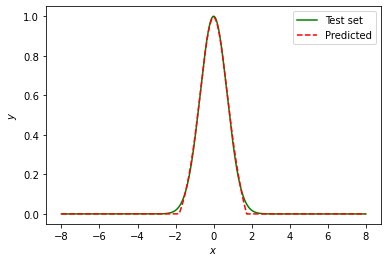

In [83]:
# Plotting predictions
y_predictions=model5.predict(x_test)
plt.plot(x_test, y_test, label = 'Test set', color='g', linestyle='-')
plt.plot(x_test, y_predictions, label = 'Predicted', color='r', linestyle='--')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.show()